In [6]:
import numpy as np

# Example run EM algorithm

## Define true Bayesian Network

In [7]:

# True CPTs
P_Q1_true = np.array([0.4, 0.6])
P_Q2xQ1_true = np.array([[0.3, 0.7], [0.2, 0.8]])
P_Y1xQ1_true = np.array([[0.1, 0.6, 0.3], [0.5, 0.1, 0.4]])
P_Y2xQ2_true = np.array([[0.5, 0.3, 0.2], [0.4, 0.2, 0.4]])
P_Y3xQ2_true = np.array([[0.4, 0.6], [0.9, 0.1]])

In [8]:
## Generate data
N = 10000

Y1_hat = np.zeros((N, 3))
Y2_hat = np.zeros((N, 3))
Y3_hat = np.zeros((N, 2))

for n in range(N):
    Q1 = np.random.choice([0, 1], p=P_Q1_true)
    Q2 = np.random.choice([0, 1], p=P_Q2xQ1_true[Q1, :])
    Y1 = np.random.choice([0, 1, 2], p=P_Y1xQ1_true[Q1, :])
    Y2 = np.random.choice([0, 1, 2], p=P_Y2xQ2_true[Q2, :])
    Y3 = np.random.choice([0, 1], p=P_Y3xQ2_true[Q2, :])
    
    Y1_hat[n, Y1] = 1
    Y2_hat[n, Y2] = 1
    Y3_hat[n, Y3] = 1

## EM algorithm

In [9]:
I = 10

P_Q1 = np.random.random((2)); P_Q1 = P_Q1 / P_Q1.sum()
P_Q2xQ1 = np.random.random((2, 2)); P_Q2xQ1 /= P_Q2xQ1.sum(axis=1, keepdims=True)
P_Y1xQ1 = np.random.random((2, 3)); P_Y1xQ1 /= P_Y1xQ1.sum(axis=1, keepdims=True)
P_Y2xQ2 = np.random.random((2, 3)); P_Y2xQ2 /= P_Y2xQ2.sum(axis=1, keepdims=True)
P_Y3xQ2 = np.random.random((2, 2)); P_Y3xQ2 /= P_Y3xQ2.sum(axis=1, keepdims=True)

# Log-likelihood over iterations
ll = np.zeros((I))

for i in range(I):
    ### E-step
    # Calculate complete probability distribution
    
    # [N, Q1, Q2, Y1, Y2, Y3]
    P = P_Q1[None, :, None, None, None, None] \
        * P_Q2xQ1[None, :, :, None, None, None] \
        * P_Y1xQ1[None, :, None, :, None, None] \
        * P_Y2xQ2[None, None, :, None, :, None] \
        * P_Y3xQ2[None, None, :, None, None, :]
    
    # Enter evidence by multiplying
    P = P \
        * Y1_hat[:, None, None, :, None, None] \
        * Y2_hat[:, None, None, None, :, None] \
        * Y3_hat[:, None, None, None, None, :]
    
    likelihood = P.sum(axis=(1, 2, 3, 4, 5))
    
    # Marginalize, unnormalized
    P_Q1 = P.sum(axis=(2, 3, 4, 5))
    P_Q2xQ1 = P.sum(axis=(3, 4, 5))
    P_Y1xQ1 = P.sum(axis=(2, 4, 5))
    P_Y2xQ2 = P.sum(axis=(1, 3, 5))
    P_Y3xQ2 = P.sum(axis=(1, 3, 4))
    
    # Normalize
    P_Q1 = P_Q1 / likelihood[:, None]
    P_Q2xQ1 = P_Q2xQ1 / likelihood[:, None, None]
    P_Y1xQ1 = P_Y1xQ1 / likelihood[:, None, None]
    P_Y2xQ2 = P_Y2xQ2 / likelihood[:, None, None]
    P_Y3xQ2 = P_Y3xQ2 / likelihood[:, None, None]
    
    ### M-step
    
    # Sum over trials
    P_Q1 = P_Q1.sum(axis=0)
    P_Q2xQ1 = P_Q2xQ1.sum(axis=0)
    P_Y1xQ1 = P_Y1xQ1.sum(axis=0)
    P_Y2xQ2 = P_Y2xQ2.sum(axis=0)
    P_Y3xQ2 = P_Y3xQ2.sum(axis=0)
    
    # Normalize
    P_Q1 /= P_Q1.sum()
    P_Q2xQ1 /= P_Q2xQ1.sum(axis=1, keepdims=True)
    P_Y1xQ1 /= P_Y1xQ1.sum(axis=1, keepdims=True)
    P_Y2xQ2 /= P_Y2xQ2.sum(axis=1, keepdims=True)
    P_Y3xQ2 /= P_Y3xQ2.sum(axis=1, keepdims=True)
    
    # Log log-likelihood
    ll[i] = np.log(likelihood).sum()


## Results

## Plot log-likelihood over iterations

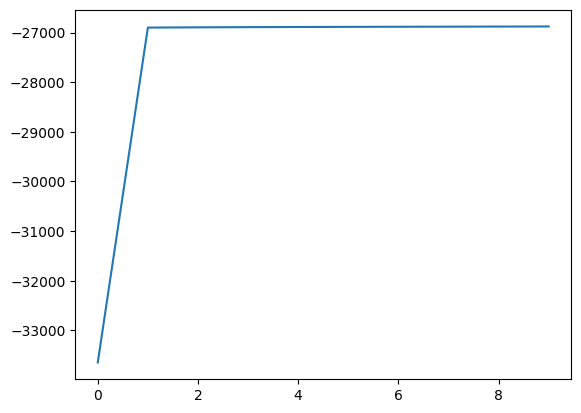

In [10]:
# Plot
import matplotlib.pyplot as plt; plt.ion()

plt.plot(ll)

In [12]:
# The log-likelihood increases at each iteration
(ll[1:] - ll[:-1] > 0).all()

True